In [3]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Importing Data

data = pd.read_csv("../data/lending_club_cleaned.csv")

In [5]:
data.shape

(395045, 79)

In [6]:
pd.set_option('display.max_columns', 79)

In [7]:
data.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,earliest_cr_year,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,loan_status_Fully Paid
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1990,1,1,0,0,0,1,0,0,0,0,0,0,1
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2004,0,1,0,1,0,0,0,0,0,0,0,0,1
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2007,0,1,0,1,0,0,0,0,0,0,0,0,1
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2006,0,1,0,0,0,0,0,0,0,0,0,0,1
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1999,0,1,0,0,1,0,0,0,0,0,0,0,0


In [8]:
data.dtypes

loan_amnt                 float64
int_rate                  float64
installment               float64
annual_inc                float64
dti                       float64
                           ...   
zip_code_48052              int64
zip_code_70466              int64
zip_code_86630              int64
zip_code_93700              int64
loan_status_Fully Paid      int64
Length: 79, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='loan_status_Fully Paid').values # must be an array
y = data['loan_status_Fully Paid'].values # must be an array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
print(X_train.max())
print(X_train.max())

1.0
1.0


In [16]:
print(X_train.min())
print(X_train.min())

0.0
0.0


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
data.shape

(395045, 79)

In [22]:
model = Sequential()

model.add(Dense(units=51, activation='relu'))

model.add(Dense(units=26, activation='relu'))

model.add(Dense(units=13, activation='relu'))

# Binary Classification

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test))

Train on 276531 samples, validate on 118514 samples
Epoch 1/100
276531/276531 [==============================] - 3s 10us/sample - loss: 0.2984 - val_loss: 0.2657
Epoch 2/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2628 - val_loss: 0.2606
Epoch 3/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2613 - val_loss: 0.2595
Epoch 4/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2600 - val_loss: 0.2600
Epoch 5/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2595 - val_loss: 0.2584
Epoch 6/100
276531/276531 [==============================] - 2s 9us/sample - loss: 0.2591 - val_loss: 0.2639
Epoch 7/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2581 - val_loss: 0.2618
Epoch 8/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2579 - val_loss: 0.2583
Epoch 9/100
276531/276531 [==============================] - 2s 8us/sample 

276531/276531 [==============================] - 2s 7us/sample - loss: 0.2468 - val_loss: 0.2652
Epoch 76/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2468 - val_loss: 0.2658
Epoch 77/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2467 - val_loss: 0.2645
Epoch 78/100
276531/276531 [==============================] - 3s 10us/sample - loss: 0.2464 - val_loss: 0.2648
Epoch 79/100
276531/276531 [==============================] - 2s 9us/sample - loss: 0.2465 - val_loss: 0.2656
Epoch 80/100
276531/276531 [==============================] - 2s 9us/sample - loss: 0.2465 - val_loss: 0.2672
Epoch 81/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2463 - val_loss: 0.2664
Epoch 82/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2462 - val_loss: 0.2647
Epoch 83/100
276531/276531 [==============================] - 2s 8us/sample - loss: 0.2461 - val_loss: 0.2656
Epoch 84/100
276531/27

In [24]:
loss_df = pd.DataFrame(model.history.history)

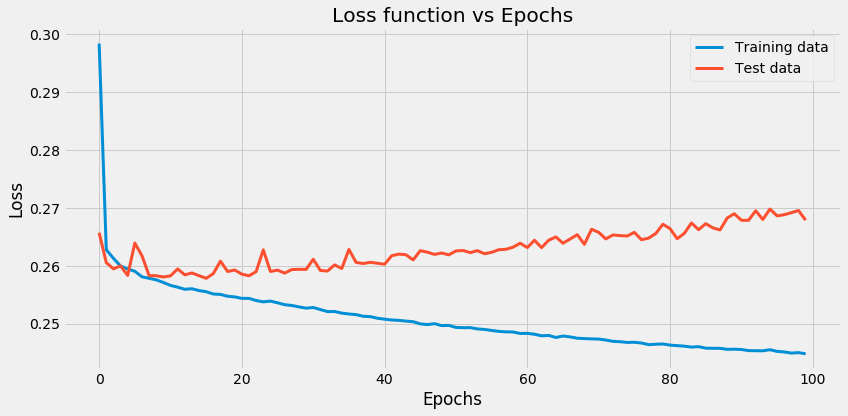

In [26]:
epochs = list(loss_df.index)
loss = list(loss_df['loss'])
val_loss = list(loss_df['val_loss'])

plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))

plt.plot(epochs, loss, linewidth=3, label='Training data')

plt.plot(epochs, val_loss, linewidth=3, label='Test data')

plt.title('Loss function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.tight_layout()

#plt.savefig('plots/loss_model1.png')

plt.show()

In [32]:
#model.save('first_model_epoch_100.h5')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()

model.add(Dense(units=79, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.2))

# Binary Classification

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [30]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 276531 samples, validate on 118514 samples
Epoch 1/100
276531/276531 [==============================] - 3s 11us/sample - loss: 0.3047 - val_loss: 0.2618
Epoch 2/100
276531/276531 [==============================] - 3s 10us/sample - loss: 0.2657 - val_loss: 0.2602
Epoch 3/100
276531/276531 [==============================] - 3s 10us/sample - loss: 0.2637 - val_loss: 0.2598
Epoch 4/100
276531/276531 [==============================] - 3s 9us/sample - loss: 0.2622 - val_loss: 0.2598
Epoch 5/100
276531/276531 [==============================] - 3s 10us/sample - loss: 0.2619 - val_loss: 0.2597
Epoch 6/100
276531/276531 [==============================] - 3s 10us/sample - loss: 0.2609 - val_loss: 0.2593
Epoch 7/100
276531/276531 [==============================] - 3s 9us/sample - loss: 0.2605 - val_loss: 0.2600
Epoch 8/100
276531/276531 [==============================] - 3s 10us/sample - loss: 0.2600 - val_loss: 0.2586
Epoch 9/100
276531/276531 [==============================] - 3s 9us/sa

In [31]:
loss_df = pd.DataFrame(model.history.history)

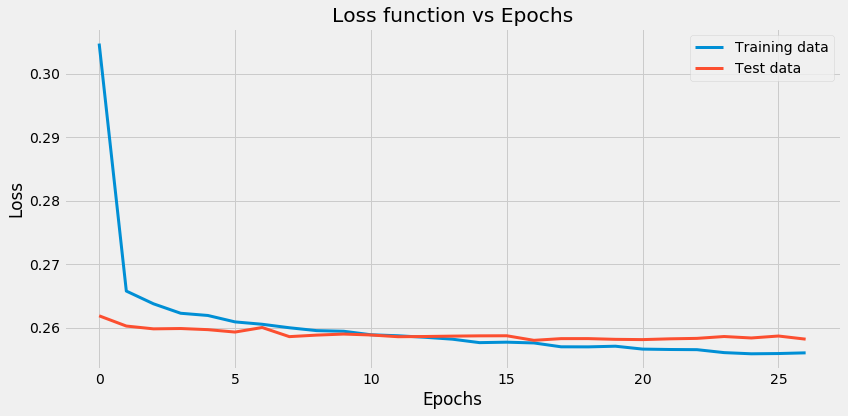

In [32]:
epochs = list(loss_df.index)
loss = list(loss_df['loss'])
val_loss = list(loss_df['val_loss'])

plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))

plt.plot(epochs, loss, linewidth=3, label='Training data')

plt.plot(epochs, val_loss, linewidth=3, label='Test data')

plt.title('Loss function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.tight_layout()

#plt.savefig('plots/loss_model2.png')

plt.show()

In [59]:
#model.save('second_model_epoch_35.h5')

### Model Evaluation

In [33]:
predictions = model.predict_classes(X_test)

In [34]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, classification_report, confusion_matrix

In [35]:
auc_score = roc_auc_score(y_test, predictions)
auc_score = round(auc_score,2)
print(auc_score)

0.72


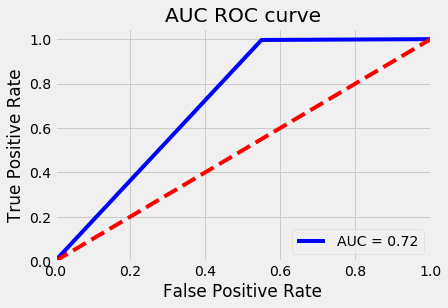

In [37]:
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(auc_score))

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.title('AUC ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#plt.savefig('plots/roc_curve.png')

plt.show()

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     23289
           1       0.88      1.00      0.94     95225

    accuracy                           0.89    118514
   macro avg       0.92      0.72      0.77    118514
weighted avg       0.90      0.89      0.87    118514



In [39]:
print(confusion_matrix(y_test, predictions))

[[10483 12806]
 [  361 94864]]


### Other Models

In [40]:
import numpy as np
import random

def random_guess(y):
    return np.random.randint(2, size=len(y))

In [41]:
y_pred = random_guess(y_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.50      0.28     23289
           1       0.80      0.50      0.62     95225

    accuracy                           0.50    118514
   macro avg       0.50      0.50      0.45    118514
weighted avg       0.68      0.50      0.55    118514

